# Tenta 2021-08-20

## Requirements

For the whole exam you should be able to import the following libraries

In [1]:
import pandas

## Level 1


**1. The file `market-price.csv` contains historical daily bitcoin data for the recent year. Write a function that extracts the value in dollars for a given date**

This can be a simple implementation looping over the lines of the file processing the line
with the matching date. Not that the return value is expected to be of type float

~~~
>>> get_usd('2021-04-01', 'market-price.csv')
58735.25
~~~

The file has the structure

    2020-08-20 00:00:00,11734.0
    2020-08-21 00:00:00,11865.82
    2020-08-22 00:00:00,11522.8
    ...

In [2]:
def get_usd(date_string, filename):
    """
    Returns exchange rate in file for given date
    """
    # YOUR CODE HERE
    

In [3]:
from solutions import get_usd
result = get_usd('2021-04-01', 'market-price.csv')
expected = 58735.25
assert result == expected, f'{result} != {expected}'

assert get_usd('2021-08-19', 'market-price.csv') == 44777.86

```{admonition} Solution
:class: dropdown
~~~
def get_usd(date_string, filename):
    """
    Returns exchange rate in file for given date
    """
    with open(filename) as f:
        for line in f:
            date, value = line.split(',')
            if date[:10] == date_string:
                break
    return float(value)
~~~
```

**2. Read tha data values to a dictionary**

Let the date format be a string in isoformat YYYY-MM-DD, which is the dictionary key and the exchange rate the
dictionary value


In [4]:
def get_usd_as_dict(filename):
    """
    Returns a dictionary with dates as keys and exchange rate as values
    """
    # YOUR CODE HERE
    

In [5]:
from solutions import get_usd_as_dict
usd = get_usd_as_dict('market-price.csv')
assert usd['2021-04-01'] == 58735.25

```{admonition} Solution
:class: dropdown
~~~
def get_usd_as_dict(filename):
    """
    Returns a dictionary with dates as keys and exchange rate as values
    """
    d = {}
    with open(filename) as f:
        for line in f:
            date, value = line.split(',')
            d[date[:10]] = float(value)
    return d
~~~
```

**3. At which date was the exchange rate highest?**

Write a function which takes a dictionary of the form of assignment 2 and returns the date with the highest rate.

Hint: look up the documentation for `sorted`.



In [6]:
def get_index_max_value(dct):
    # YOUR CODE HERE
    ...
    

In [7]:
from solutions import get_index_max_value
assert get_index_max_value(usd) == '2021-04-14'
assert usd['2021-04-14'] == 63554.44

```{admonition} Solution
:class: dropdown
~~~
def get_index_max_value(dct):
    return sorted(dct, key=lambda k: dct[k])[-1]
~~~
```

**4. Dollar cost averaging**

Dollar cost averaging (DCA) means to save a fixed amount in dollars on a regular basis. An asset with large variation in value over time is high risk saving, but DCA is beleived to reduce risk in a longer perspective. Assume that you save 1 dollar per day converting it to btc without any exchange fees. What is the total btc accumulated  during this year.


In [8]:
def dca(dct):
    """
    Return total btc acuumulated from $1/day
    """
    # YOUR CODE HERE
    

In [9]:
from solutions import dca
assert dca({'2008-01-01': 10, '2008-01-02': 40}) == .125
assert round(dca(usd), 8) == 0.01529260  # values is a dict from assignment 2

```{admonition} Solution
:class: dropdown
~~~
def dca(dct):
    """
    Return total btc acuumulated from $1/day
    """
    btc = 0
    daily = 1.0
    for v in dct.values():
        btc += daily/v
    return btc
~~~
```

*Observation*:
the total invested and  value at the end of the year

In [10]:
print('The total invested:', len(usd))
print('Value after one year', round(dca(usd) * list(usd.values())[-1], 2))

The total invested: 365
Value after one year 684.77


## Level 2

**5. Use of pandas**

Read in the data in `market-price.csv` as a pandas DataFrame. Initially it may look ill-formatted, if the data file does not have headers if its own

          2020-08-20 00:00:00 	11734.0
    0 	2020-08-21 00:00:00 	11865.82
    1 	2020-08-22 00:00:00 	11522.80
    2 	2020-08-23 00:00:00 	11683.44
    ... 
  

In [11]:
import pandas
data = (
    # YOUR CODE HERE
    ...
)
# data.head()

In [12]:
from solutions import data0 as data
assert isinstance(data, pandas.DataFrame)

```{admonition} Solution
:class: dropdown
~~~
pandas.read_csv('market-price.csv')
~~~
```

**6. Find options in 5. so that column headers are 'date' and 'USD'**

          date 	                USD
    0 	2020-08-20 00:00:00 	11734.00
    1 	2020-08-21 00:00:00 	11865.82
    2 	2020-08-22 00:00:00 	11522.80
    3 	2020-08-23 00:00:00 	11683.44
    4 	2020-08-24 00:00:00 	11653.02

In [13]:
#data = (
    # YOUR CODE HERE
#)
data.head()

,2020-08-20 00:00:00,11734.0
0,2020-08-21 00:00:00,11865.82
1,2020-08-22 00:00:00,11522.80
2,2020-08-23 00:00:00,11683.44
3,2020-08-24 00:00:00,11653.02
4,2020-08-25 00:00:00,11763.93


In [14]:
from solutions import data1 as data
assert all(data.columns == ['date', 'USD'])

```{admonition} Solution
:class: dropdown
~~~
    pandas.read_csv('market-price.csv', names=['date', 'USD']),
~~~
```

**7. How du you make the date column a dataframe index?**

                             USD
    date 	
    2020-08-20 00:00:00 	11734.00
    2020-08-21 00:00:00 	11865.82
    2020-08-22 00:00:00 	11522.80
    ...
    

In [15]:
#data = (
    # YOUR CODE HERE
#)
#data.head()

In [16]:
from solutions import data2 as data
assert data.columns == ['USD']
assert data.index.name == 'date'
data.dtypes

USD    float64
dtype: object

```{admonition} Solution
:class: dropdown
~~~
    pandas.read_csv('market-price.csv', names=['date', 'USD']).set_index('date'),
~~~
```

**8. convert the expression to a Series object**

    date
    2020-08-20    11734.00
    2020-08-21    11865.82
    2020-08-22    11522.80
    ...
    Name: USD, dtype: float64

In [17]:
#data = (
    # YOUR CODE HERE
#)
data.head()

,USD
date,
2020-08-20 00:00:00,11734.00
2020-08-21 00:00:00,11865.82
2020-08-22 00:00:00,11522.80
2020-08-23 00:00:00,11683.44
2020-08-24 00:00:00,11653.02


In [18]:
from solutions import data3 as data
assert isinstance(data, pandas.Series)
assert data.name == 'USD'
assert data.index.name == 'date'
assert data.dtype == 'float'

*Observation*: date-like entries can be processed with the option parse_dates=[0], so that Python can internally use date-types. See e.g. the difference it makes for plotting. Use this in next assignment

<Axes: xlabel='date'>

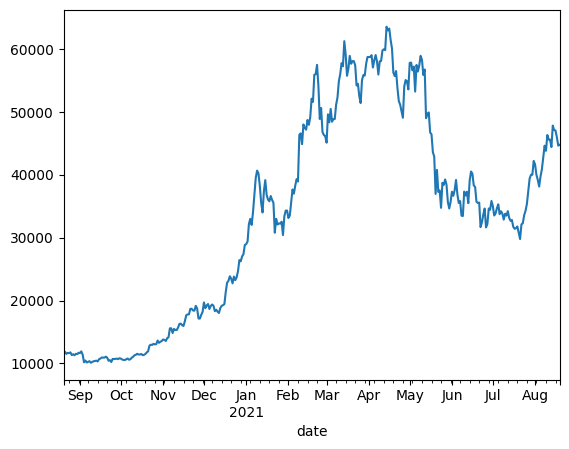

In [19]:
data.plot()

## Level 3

The goal here is to obtain a decorator that returns values from `market-price.csv` in SEK insted of USD given the exchange rate for a given date in the file `exchange-rates.csv`



**9.** Verify that the `Date` column has the pandas datatype `Timestamp`

In [20]:
# exchange_rates = (
#    # YOUR CODE HERE
#)
#exchange_rates.head()

In [21]:
from solutions import exchange_rates0 as exchange_rates
assert isinstance(exchange_rates.iloc[0]['Date'], pandas.Timestamp)

```{admonition} Solution
:class: dropdown
~~~
exchange_rates = (
    pandas.read_csv('exchange-rates.csv', parse_dates=[0])
)
~~~
```

**10.** Create a column with dates in string iso format. The result of the following cell is us2sek as a pandas.Series object

*Hint: work with the `apply` method of a series and a function that uses datetime.isoformat*

In [22]:
from solutions import exchange_rates1 as exchange_rates
exchange_rates.head()

,Date,USD,SEK,isodate
0,2021-08-18,1,8.7207,2021-08-18
1,2021-08-17,1,8.6639,2021-08-17
2,2021-08-16,1,8.6653,2021-08-16
3,2021-08-15,1,8.6692,2021-08-15
4,2021-08-14,1,8.6692,2021-08-14


```{admonition} Solution
:class: dropdown
~~~
isodate = exchange_rates.Date.apply(lambda x: x.isoformat()[:10])
exchange_rates['isodate'] = isodate
~~~
```

In [23]:
exchange_rates.head()

,Date,USD,SEK,isodate
0,2021-08-18,1,8.7207,2021-08-18
1,2021-08-17,1,8.6639,2021-08-17
2,2021-08-16,1,8.6653,2021-08-16
3,2021-08-15,1,8.6692,2021-08-15
4,2021-08-14,1,8.6692,2021-08-14


In [24]:
from solutions import us2sek
assert isinstance(us2sek, pandas.Series)
assert us2sek['2020-08-18'] == 8.6679

In [25]:
# YOUR CODE HERE

exchange_rates.set_index('isodate', inplace=True)
us2sek = exchange_rates['SEK']
us2sek

isodate
2021-08-18    8.7207
2021-08-17    8.6639
2021-08-16    8.6653
2021-08-15    8.6692
2021-08-14    8.6692
               ...  
2020-08-22    8.8053
2020-08-21    8.8053
2020-08-20    8.7388
2020-08-19    8.6433
2020-08-18    8.6679
Name: SEK, Length: 366, dtype: float64

**11.** Complete a decorator so that `get_sek` returns the btc value in SEK instead of dollars

In [26]:

def convert(f):
    # YOUR CODE HERE
    ...
get_sek = convert(get_usd)
        

In [28]:
from solutions import get_sek
assert get_sek('2020-08-20', 'market-price.csv').round(2) == 102541.08

In [29]:
assert get_sek('2021-08-18', 'market-price.csv').round(2) == 389366.78